In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
# Loading in the dataset
data = pd.read_csv('data/nobel.csv')
print(data.columns)
print(data.head())

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')
   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]


In [2]:
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
# Extracting the most common gender and birth country
top_gender = data['sex'].mode()[0]
top_country = data['birth_country'].mode()[0]

print("the most commonly awarded gender is " + top_gender +", while the most commonly awarded birth country is " + top_country)

the most commonly awarded gender is Male, while the most commonly awarded birth country is United States of America


In [4]:
# Creating a column to identify winners from the United States
data['is_us_born_winner'] = data['birth_country'] == 'United States of America'

# Creating a decade column
data['decade'] = (data['year'] // 10) * 10

# Displaying the first few rows to verify the new columns
print(data.head())

   year    category  ... is_us_born_winner decade
0  1901   Chemistry  ...             False   1900
1  1901  Literature  ...             False   1900
2  1901    Medicine  ...             False   1900
3  1901       Peace  ...             False   1900
4  1901       Peace  ...             False   1900

[5 rows x 20 columns]


decade
2000    0.422764
1990    0.403846
2020    0.360000
1980    0.319588
1970    0.317308
2010    0.314050
1940    0.302326
1950    0.291667
1960    0.265823
1930    0.250000
1910    0.075000
1920    0.074074
1900    0.017544
Name: is_us_born_winner, dtype: float64
2000


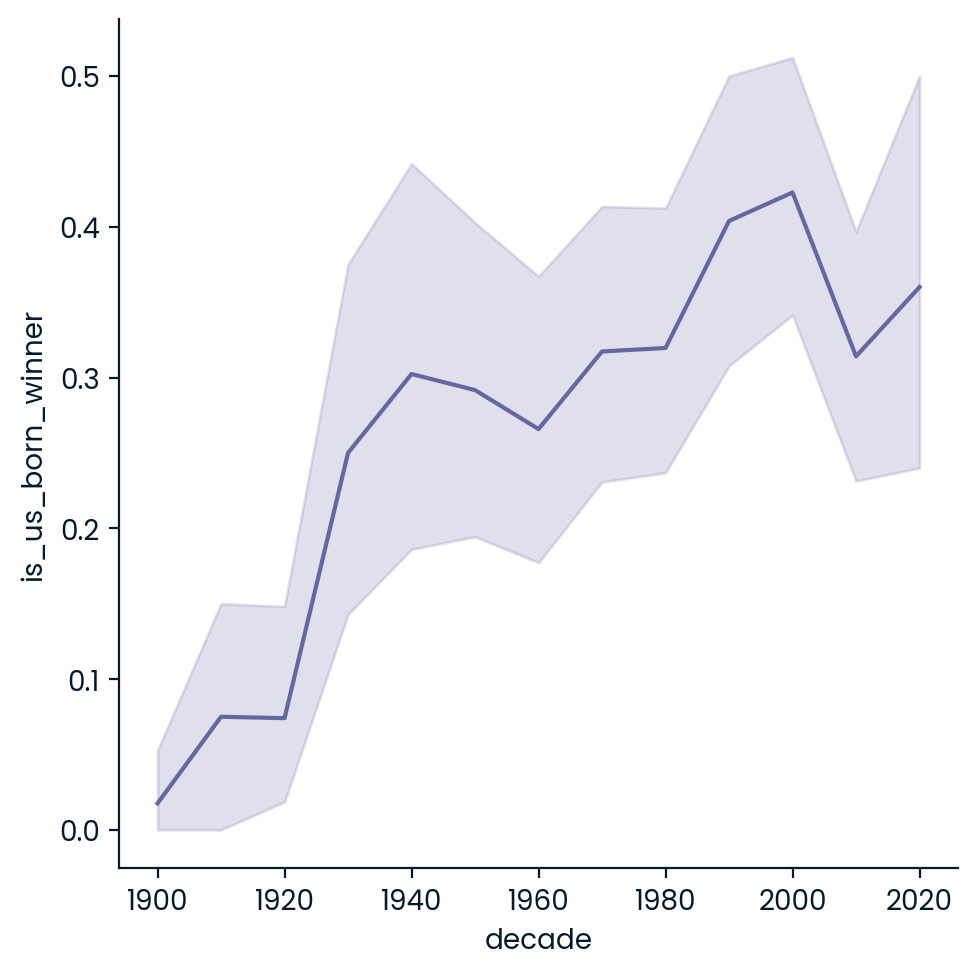

In [5]:
# Calculating the ratio of US-born winners by decade
us_winners_by_decade = data.groupby('decade')['is_us_born_winner'].mean().sort_values(ascending=False)
print(us_winners_by_decade)

# Finding the decade with the highest ratio of US-born winners
max_decade_usa = us_winners_by_decade.idxmax()
print(max_decade_usa)

sns.relplot(x="decade", y="is_us_born_winner", data=data, kind="line")


In [6]:
# Filtering for female winners
data['is_female_winner'] = data['sex'] == 'Female'

# Grouping by decade and category and calculating the proportion of female winners
female_cat_dec_prop = data.groupby(['decade', 'category'])['is_female_winner'].mean()

# Finding the decade and category with the highest proportion of female winners
print(female_cat_dec_prop.sort_values(ascending=False))

decade  category  
2020    Literature    0.500000
2010    Peace         0.357143
1990    Literature    0.300000
2000    Literature    0.300000
2020    Chemistry     0.300000
                        ...   
1960    Peace         0.000000
1970    Economics     0.000000
        Literature    0.000000
        Physics       0.000000
        Chemistry     0.000000
Name: is_female_winner, Length: 72, dtype: float64


In [7]:
# Creating dictionary for decade and category with the highest proportion of female winners
max_female_dict = {2020:'Literature'}
print(max_female_dict)

{2020: 'Literature'}


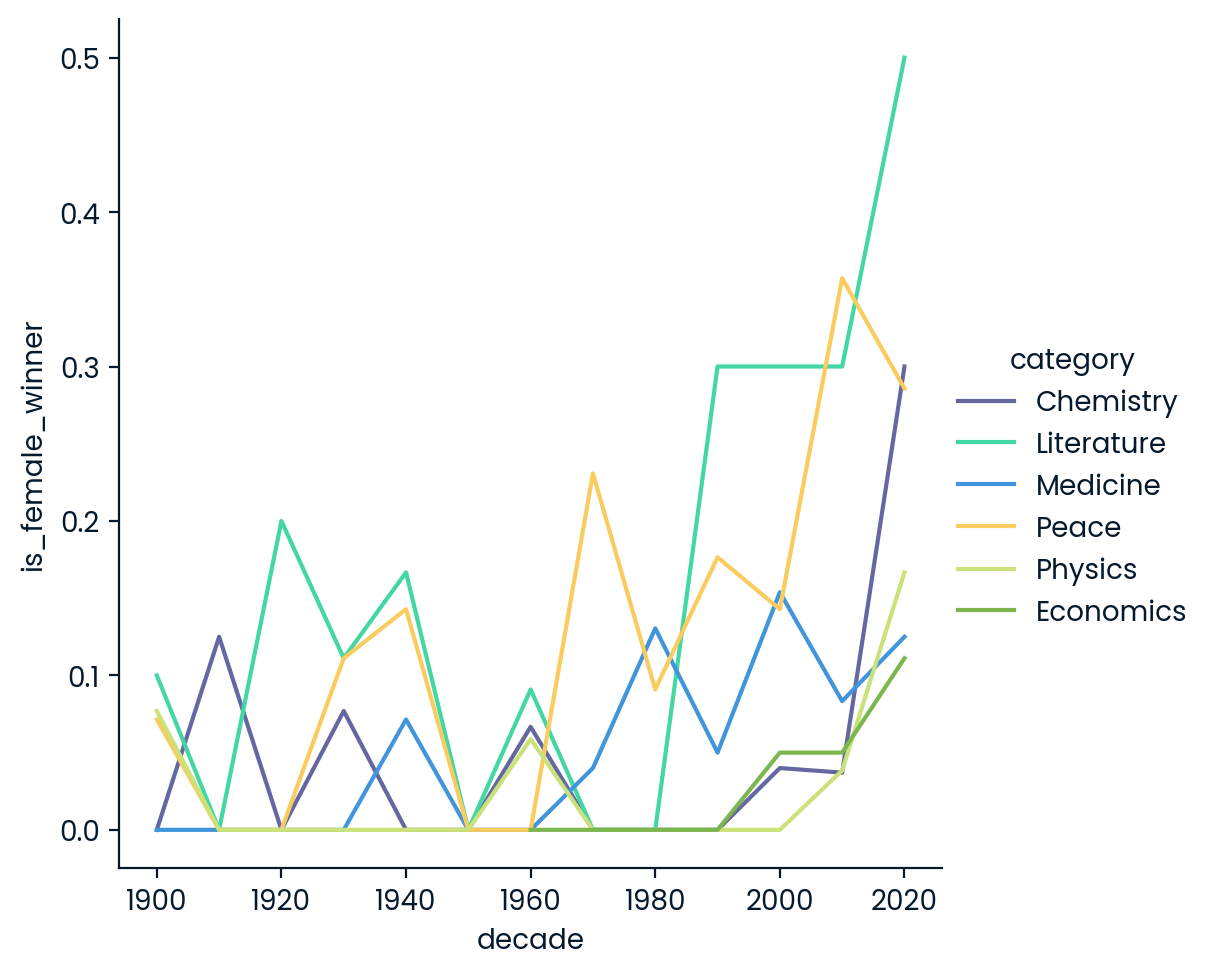

In [8]:
# Relational line plot of female winner proportions by decade and category
sns.relplot(x="decade", y="is_female_winner", data=data, kind="line", hue='category', ci=None)

In [9]:
# Finding the first woman to win a Nobel Prize
female_winners = data[data['is_female_winner'] == True]
female_winners_sorted = female_winners.sort_values(by='year')
first_female_winner = female_winners_sorted.iloc[0]
first_woman_name = first_female_winner['full_name']
first_woman_category = first_female_winner['category']

# Displaying results
first_woman_name, first_woman_category

('Marie Curie, née Sklodowska', 'Physics')

In [10]:
# Identifying repeat winners

repeat_winners = data['full_name'].value_counts() >= 2

# Extracting True index elements and converting to list
repeat_list = repeat_winners[repeat_winners].index.tolist()

# Displaying results
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']